<a href="https://colab.research.google.com/github/nithinbadicodes/AI-ML-Projects/blob/master/LoanRepaymentPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Repayment Prediction

In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Checking for null values**

In [10]:
df.isnull().sum().sum()

np.int64(0)

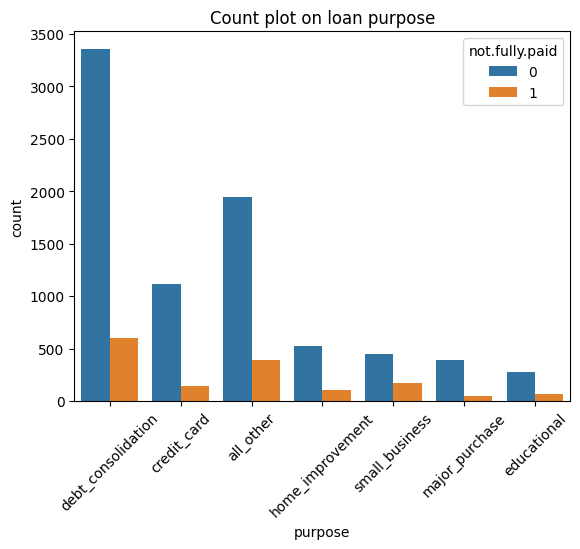

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=45)
plt.title('Count plot on loan purpose');

In [12]:
df.purpose.value_counts()

,count
purpose,
debt_consolidation,3957
all_other,2331
credit_card,1262
home_improvement,629
small_business,619
major_purchase,437
educational,343


## Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['purpose'] = le.fit_transform(df['purpose'])
df.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
4398,1,1,0.0740,186.36,11.608236,12.86,787,9484.000000,63621,13.2,0,0,0,0
8952,0,2,0.1411,143.77,11.083127,14.24,682,6930.000000,17126,81.6,5,0,0,0
4945,1,0,0.1253,568.93,11.225243,14.15,727,3179.958333,4071,30.2,1,0,0,0
8422,0,2,0.1576,413.46,10.896739,18.96,652,5850.000000,15827,82.0,1,0,0,0
178,1,3,0.0775,156.11,10.858999,9.55,767,12960.041670,4067,7.3,0,0,0,0


In [14]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [15]:
df['purpose'].value_counts()

,count
purpose,
2,3957
0,2331
1,1262
4,629
6,619
5,437
3,343


## Data Visualization

Text(0.5, 0, 'FICO')

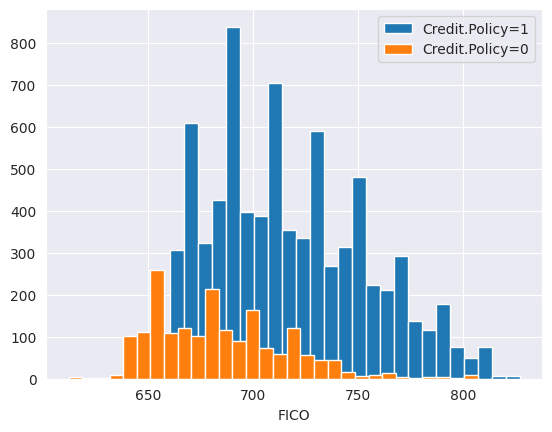

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy']==1], bins=30, label='Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy']==0], bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

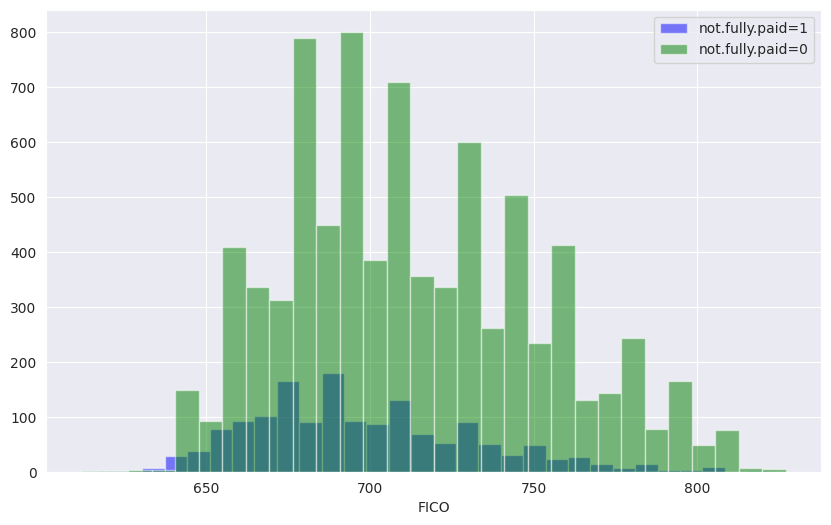

In [17]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='green', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

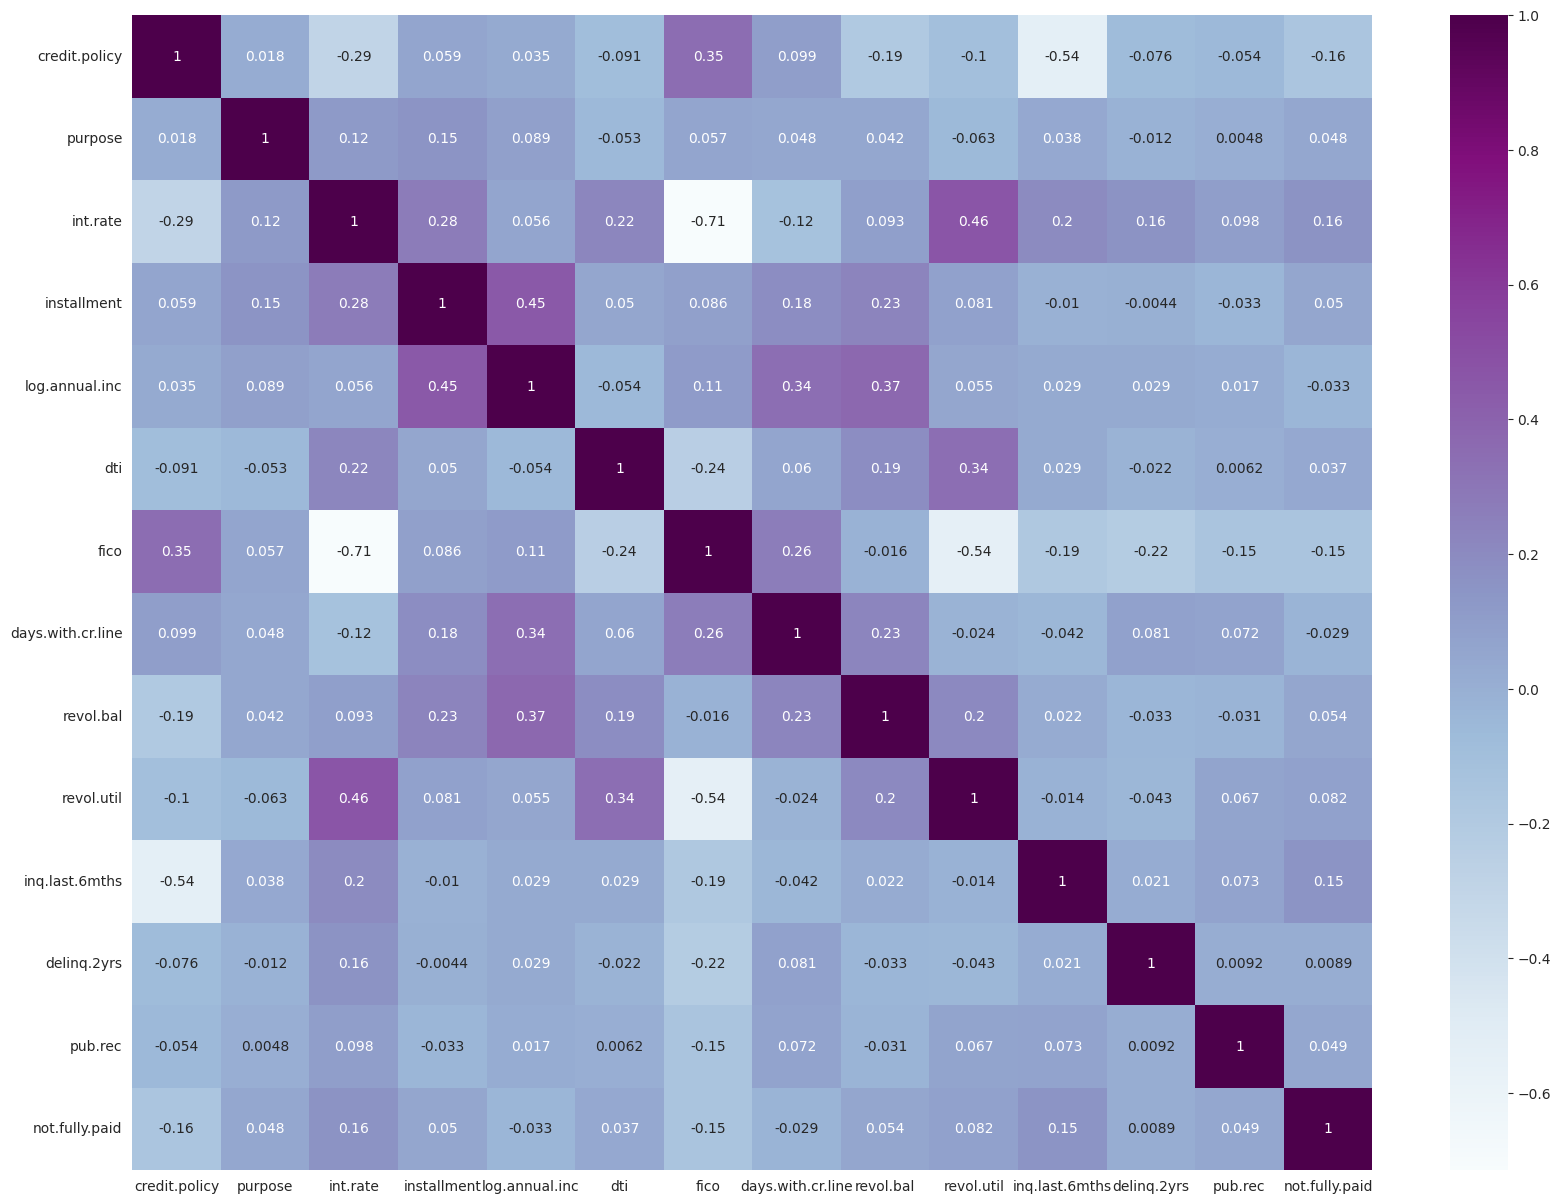

In [18]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), cmap='BuPu', annot=True)
plt.show()

**Let's explore the relationship between FICO and interest rate further**

<Figure size 1000x600 with 0 Axes>

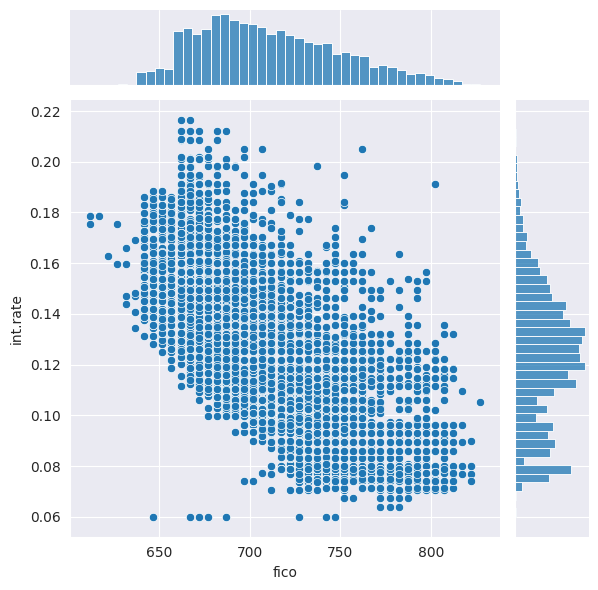

In [19]:
#checking the trend between FICO and the interest rate
plt.figure(figsize=(10,6))
sns.jointplot(x='fico', y='int.rate', data=df)

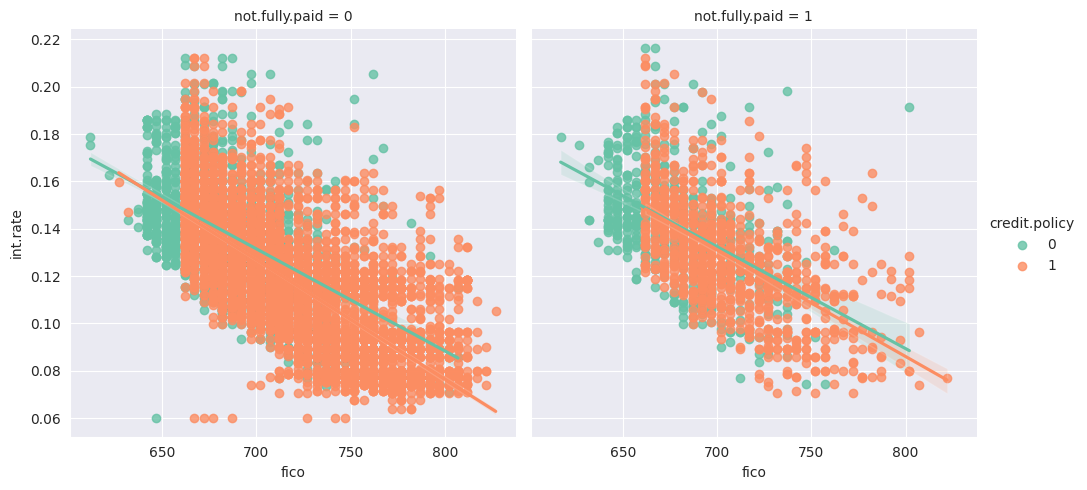

In [20]:
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')


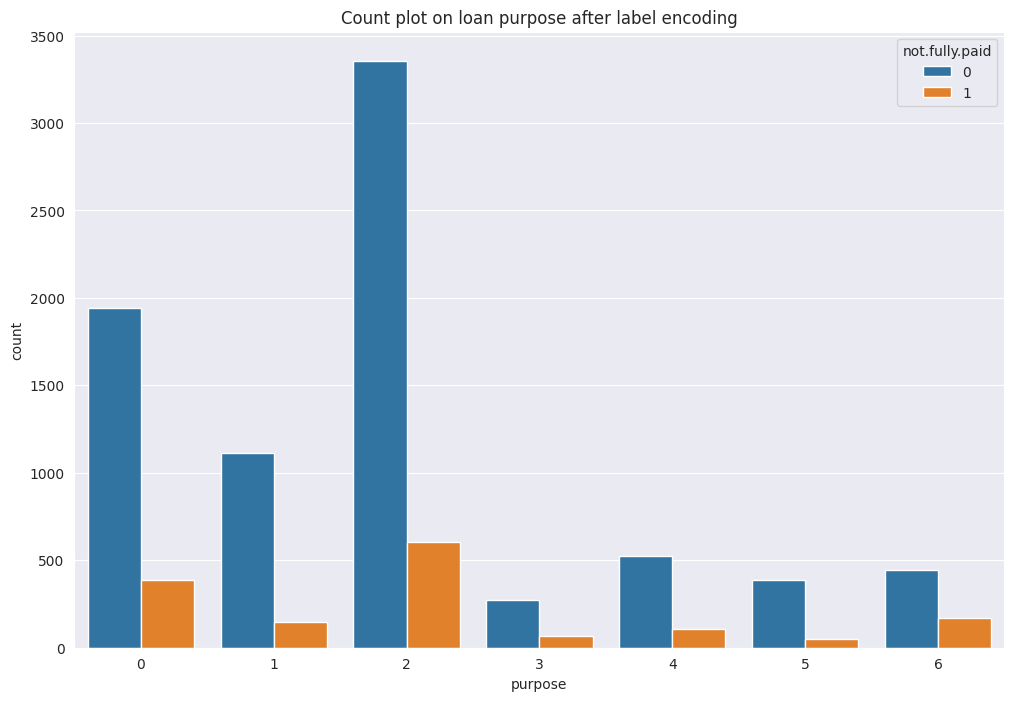

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.title('Count plot on loan purpose after label encoding');


* purpose
 * debt_consolidation	3957
 * all_other	2331
 * credit_card	1262
 * home_improvement	629
 * small_business	619
 * major_purchase	437
 * educational	343

In [22]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [23]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

## Modelling

**train-test-split**

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
len(X_train),len(X_test)

(6704, 2874)

### Decision Tree

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [2,3,5, 10],
    'criterion': ['gini', 'entropy']
}
dtc = DecisionTreeClassifier()

dtc_model = GridSearchCV(dtc,param_grid=param_grid,verbose=False)

In [28]:
dtc_model.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10]},
             verbose=False)

In [29]:
dtc_model.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2408    0]
 [ 466    0]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874



<---------------Accuracy Scores------------------->

Train Accuracy score:  0.8408412887828163
Test Accuracy score: 0.83785664578984


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=600)
rf_clf.fit(X_train, y_train)
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2394   14]
 [ 456   10]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.42      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.77      0.84      0.77      2874



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8364648573416841


> Best model for this dataset is Random Forest Classifier